### NLP Project Steps for Spam Detection.

**Step 1** - Convert Target variables ham to 0 and spam to 1

**Step 2** - Preprocess the text

            - Convert to Lower Case
            - Remove Special Characters
            - Remove Stop Words
            - Apply Lemmatization
            - Join All the words to sentences
**Step 3** - Word Embeddings

            - Use count vectorizer or tfidf vectorizer to convert words in numbers
**Step 4** - Do Upsampling - (Smote, resample etc.)

**Step 5** - Train Test Split

**Step 6** - Apply Classification Models (Naive Bayes,Logistic, Decision Tree or Ensembles, SVM etc.)

**Step 7** - Model Evaluation - Metrics (Confusion Matrix, Classification Report)

**Step 8** - Testing with new string

            - Take input of new string
            - Undergo with step2 same preprocessing as train data
            - Apply tfidf.transform or cv.transform for input
            - Then model.predict
            - Evalute your model using predictions

In [2]:
import pandas as pd
import numpy as np
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
stop = stopwords.words('english')
nltk.download('wordnet')
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.preprocessing import LabelEncoder

[nltk_data] Error loading punkt: <urlopen error [WinError 10061] No
[nltk_data]     connection could be made because the target machine
[nltk_data]     actively refused it>
[nltk_data] Error loading stopwords: <urlopen error [WinError 10061]
[nltk_data]     No connection could be made because the target machine
[nltk_data]     actively refused it>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [3]:
spam_data = pd.read_csv('spam.csv',encoding='latin-1')
spam_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# Deleting all Unnamed columns 
spam_data.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 0,inplace=True)

In [5]:
# Reading the first five rows
spam_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# The shape of the dataset
spam_data.shape

(5572, 2)

In [7]:
# For the Target variable Encoding as Ham = 0, spam = 1
le = LabelEncoder()
spam_data['v1'] = le.fit_transform(spam_data.v1)
spam_data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Preprocessing the Text Data in the dataset

In [8]:
# Lematizing all the words
lem = WordNetLemmatizer()

In [9]:
# Preprocessing of the give sentences
sent_preprocess = []
for sents in spam_data.v2:
    sent = sents.lower()
    res = re.sub(r'\W',' ',sent)
    res = re.sub(r'\s+',' ',res)
    
    sent_preprocess.append(lem.lemmatize(res))

In [10]:
sent_preprocess

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat ',
 'ok lar joking wif u oni ',
 'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry question std txt rate t c s apply 08452810075over18 s',
 'u dun say so early hor u c already then say ',
 'nah i don t think he goes to usf he lives around here though',
 'freemsg hey there darling it s been 3 week s now and no word back i d like some fun you up for it still tb ok xxx std chgs to send å 1 50 to rcv',
 'even my brother is not like to speak with me they treat me like aids patent ',
 'as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press 9 to copy your friends callertune',
 'winner as a valued network customer you have been selected to receivea å 900 prize reward to claim call 09061701461 claim code kl341 valid 12 hours only ',
 'had your mobile 11 months or more u r ent

In [11]:
word_dict = {}
for sent in sent_preprocess:
    for word in word_tokenize(sent):#splitting into words
        if word not in word_dict.keys():
            word_dict.update({word:1})
        else:
            word_dict.update({word:word_dict[word]+1})

In [12]:
word_dict

{'go': 280,
 'until': 27,
 'jurong': 1,
 'point': 13,
 'crazy': 15,
 'available': 18,
 'only': 218,
 'in': 898,
 'bugis': 7,
 'n': 153,
 'great': 115,
 'world': 38,
 'la': 7,
 'e': 96,
 'buffet': 2,
 'cine': 7,
 'there': 232,
 'got': 251,
 'amore': 1,
 'wat': 107,
 'ok': 292,
 'lar': 38,
 'joking': 6,
 'wif': 27,
 'u': 1192,
 'oni': 4,
 'free': 284,
 'entry': 26,
 '2': 528,
 'a': 1433,
 'wkly': 14,
 'comp': 12,
 'to': 2242,
 'win': 75,
 'fa': 4,
 'cup': 8,
 'final': 18,
 'tkts': 4,
 '21st': 3,
 'may': 50,
 '2005': 3,
 'text': 193,
 '87121': 4,
 'receive': 38,
 'question': 22,
 'std': 11,
 'txt': 177,
 'rate': 32,
 't': 467,
 'c': 119,
 's': 568,
 'apply': 32,
 '08452810075over18': 2,
 'dun': 55,
 'say': 92,
 'so': 461,
 'early': 33,
 'hor': 2,
 'already': 91,
 'then': 243,
 'nah': 10,
 'i': 3001,
 'don': 162,
 'think': 132,
 'he': 230,
 'goes': 26,
 'usf': 11,
 'lives': 4,
 'around': 61,
 'here': 123,
 'though': 27,
 'freemsg': 14,
 'hey': 112,
 'darling': 5,
 'it': 744,
 'been': 130,


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


### Creating the dataframe By Count Vectorizer

In [14]:
cv = CountVectorizer()
X_cv = cv.fit_transform(sent_preprocess).toarray()
X_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
X_cv.shape

(5572, 8672)

In [16]:
df_cv = pd.DataFrame(X_cv,columns=cv.get_feature_names())
df_cv.tail()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,ó_,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df_cv['Target'] = spam_data['v1']

In [18]:
df_cv.head()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell,Target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Independent and Dependent Variables

In [19]:
X = df_cv.drop('Target',axis=1)  #Independent variable
y = df_cv['Target']   #Dependent Variable

### Resampling the data 

In [20]:
## Over Sampling using SMOTE
import imblearn
from imblearn.over_sampling import SMOTE

In [21]:
x_resmaple,y_resample = SMOTE().fit_resample(X,y)

In [22]:
np.savez('spam.npz',x_resmaple,y_resample)

In [23]:
df_over = np.load('spam.npz')
df_over.files

['arr_0', 'arr_1']

In [24]:
x_over = df_over['arr_0']
y_over = df_over['arr_1']

### Train and Test Split

In [25]:
np.random.seed(1001)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_over,y_over,test_size = 0.2)

In [26]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, roc_auc_score, roc_curve, recall_score
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import log_loss


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [31]:
classification_algos_name = ["SVC", "KNeighborsClassifier", "GaussianNB", 
                              "LogisticRegression", "DecisionTreeClassifier", 
                             "RandomForestClassifier", "AdaBoostClassifier",
                            "GradientBoostingClassifier"]

In [32]:
classification_algos=[SVC(), KNeighborsClassifier(), GaussianNB(),
                      LogisticRegression(), 
                      DecisionTreeClassifier(), RandomForestClassifier(),
                      AdaBoostClassifier(),GradientBoostingClassifier()]

In [33]:
accuracy_score_list = []
for mod in classification_algos:
    model = mod
    model.fit(X_train, y_train)
    y_pred_all = model.predict(X_test)
    accuracy_score_list.append(accuracy_score(y_test,y_pred_all))
for idx,i in enumerate(accuracy_score_list):
    print(classification_algos_name[idx]," ",i)

SVC   0.9642487046632124
KNeighborsClassifier   0.6124352331606218
GaussianNB   0.944559585492228
LogisticRegression   0.9632124352331606
DecisionTreeClassifier   0.938860103626943
RandomForestClassifier   0.9689119170984456
AdaBoostClassifier   0.9020725388601036
GradientBoostingClassifier   0.927979274611399


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

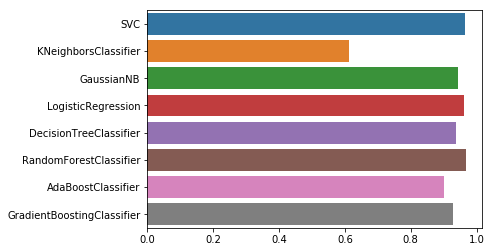

In [36]:

sns.barplot(x = accuracy_score_list, y = classification_algos_name)
plt.show()

### Random Forest Classifier

In [46]:
model_rf = RandomForestClassifier().fit(X_train,y_train)
y_pred_rf = model_rf.predict(X_test)

In [57]:
y_prob_rf = model_rf.predict_proba(X_test)

In [49]:
cm = confusion_matrix(y_test,y_pred_rf)


Text(24.0, 0.5, 'True Values')

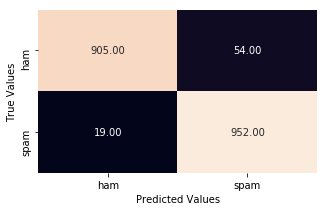

In [53]:
plt.figure(figsize = (5,3))

sns.heatmap(cm,annot = True,fmt = '0.2f',xticklabels=['ham','spam'],
           yticklabels=['ham','spam'],cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')

In [54]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       959
           1       0.95      0.98      0.96       971

    accuracy                           0.96      1930
   macro avg       0.96      0.96      0.96      1930
weighted avg       0.96      0.96      0.96      1930



In [55]:
kappa = cohen_kappa_score(y_test,y_pred_rf) # Kappa Score
print('Kappa Score =',kappa)

print('\n'+'*'*30+'Area Under Curve Score'+'*'*30+'\n\n')
# AUC score
roc_a = roc_auc_score(y_test,y_pred_rf) # Kappa Score
print('AUC Score =',roc_a)

Kappa Score = 0.9243323426199732

******************************Area Under Curve Score******************************


AUC Score = 0.9620619444602546


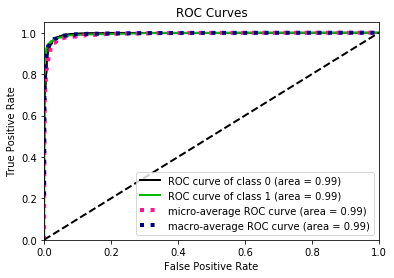

In [58]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test,y_prob_rf)
plt.show()


### Logistic Regression 

In [60]:
model_lr = LogisticRegression().fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)
y_prob_lr = model_lr.predict_proba(X_test)

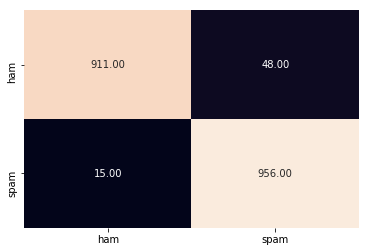

In [61]:
cm = confusion_matrix(y_test,y_pred_lr)

sns.heatmap(cm,annot = True, xticklabels=['ham','spam'],
           yticklabels=['ham','spam'],fmt = '0.2f',cbar=False)

In [62]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       959
           1       0.95      0.98      0.97       971

    accuracy                           0.97      1930
   macro avg       0.97      0.97      0.97      1930
weighted avg       0.97      0.97      0.97      1930



In [64]:
kappa = cohen_kappa_score(y_test,y_pred_lr) # Kappa Score
print('Kappa Score =',kappa)

print('\n'+'*'*30+'Area Under Curve Score'+'*'*30+'\n\n')
# AUC score
roc_a = roc_auc_score(y_test,y_pred_lr) # Kappa Score
print('AUC Score =',roc_a)

Kappa Score = 0.9346986168502166

******************************Area Under Curve Score******************************


AUC Score = 0.9672499352977751


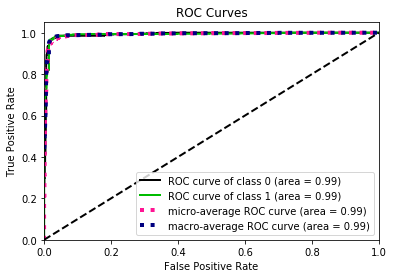

In [65]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test,y_prob_lr)
plt.show()


## Test Data

In [34]:
text = ['Dear Koorimi Kiran Kumar,Your family needs thisCommitment from you','New announcement: Word Embedding File',
        'Is the coronavirus disease (COVID-19) affecting your business?',
        'We’ve got some new Academics course recommendations for you!']

In [36]:
test = pd.DataFrame(text, columns = ['v2'])
test

,v2
0,"Dear Koorimi Kiran Kumar,Your family needs thi..."
1,New announcement: Word Embedding File
2,Is the coronavirus disease (COVID-19) affectin...
3,We’ve got some new Academics course recommenda...


In [39]:
sent_preprocess_test = []
for sents in test.v2:
    sent = sents.lower()
    res = re.sub(r'\W',' ',sent)
    res = re.sub(r'\s+',' ',res)

    sent_preprocess_test.append(lem.lemmatize(res))

In [40]:
sent_preprocess_test

['dear koorimi kiran kumar your family needs thiscommitment from you',
 'new announcement word embedding file',
 'is the coronavirus disease covid 19 affecting your business ',
 'we ve got some new academics course recommendations for you ']

In [41]:
word_dict = {}
for sent in sent_preprocess_test:
    for word in word_tokenize(sent):#splitting into words
        if word not in word_dict.keys():
            word_dict.update({word:1})
        else:
            word_dict.update({word:word_dict[word]+1})

In [42]:
word_dict

{'dear': 1,
 'koorimi': 1,
 'kiran': 1,
 'kumar': 1,
 'your': 2,
 'family': 1,
 'needs': 1,
 'thiscommitment': 1,
 'from': 1,
 'you': 2,
 'new': 2,
 'announcement': 1,
 'word': 1,
 'embedding': 1,
 'file': 1,
 'is': 1,
 'the': 1,
 'coronavirus': 1,
 'disease': 1,
 'covid': 1,
 '19': 1,
 'affecting': 1,
 'business': 1,
 'we': 1,
 've': 1,
 'got': 1,
 'some': 1,
 'academics': 1,
 'course': 1,
 'recommendations': 1,
 'for': 1}

In [43]:
test = cv.transform(sent_preprocess_test).toarray()
test.shape


(4, 8672)

In [70]:
df_test = pd.DataFrame(test,columns=cv.get_feature_names())
df_test.tail()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,ó_,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
prediction = model_rf.predict(df_test)

In [72]:
df_test['Target'] = prediction

In [73]:
df_test

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell,Target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Random Forest GridSearch Cross Validation

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
tuned_parameter = [{'n_estimators':[10,20,30],
                   'criterion':['gini','entropy'],
                   'max_depth':[10,15],
                   'max_features':['sqrt','log2']}]

In [76]:
model_tune = RandomForestClassifier()

In [77]:
clf = GridSearchCV(model_tune,param_grid = tuned_parameter,cv = 10,
                   scoring='roc_auc')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [78]:
y_prob_clf = clf.predict_proba(X_test)
y_pred_clf = clf.predict(X_test)

Text(24.0, 0.5, 'True Values')

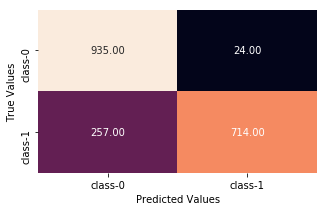

In [79]:
cm = confusion_matrix(y_test,y_pred_clf)
plt.figure(figsize = (5,3))

sns.heatmap(cm,annot = True,fmt = '0.2f',xticklabels=['class-0','class-1'],
           yticklabels=['class-0','class-1'],cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')

In [80]:
cr = classification_report(y_test,y_pred_clf)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.97      0.87       959
           1       0.97      0.74      0.84       971

    accuracy                           0.85      1930
   macro avg       0.88      0.86      0.85      1930
weighted avg       0.88      0.85      0.85      1930



In [81]:
kappa = cohen_kappa_score(y_test,y_pred_clf) # Kappa Score
print('Kappa Score =',kappa)

print('\n'+'*'*30+'Area Under Curve Score'+'*'*30+'\n\n')
# AUC score
roc_a = roc_auc_score(y_test,y_pred_clf) # Kappa Score
print('AUC Score =',roc_a)

Kappa Score = 0.7092335621234265

******************************Area Under Curve Score******************************


AUC Score = 0.8551491695026466


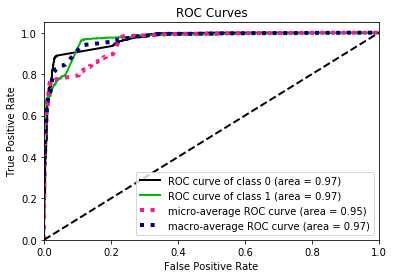

In [82]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test,y_prob_clf)
plt.show()
